In [1]:
#Import Dependencies

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
from sqlalchemy import Column, Integer, String, Float


In [2]:
file_name = 'Data/2017.csv'

In [3]:
happiness_data = pd.read_csv(file_name)
happiness_data.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [4]:
happiness_new_data = happiness_data.drop(['Whisker.high','Whisker.low'], axis=1)
happiness_new_data.head()

,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [5]:
happiness_new_data.columns = ['Country','Rank','Score','GDP','Family','LifeExpectancy','Freedom','Generosity','Trust','DystopiaResidual']
happiness_new_data.head()

,Country,Rank,Score,GDP,Family,LifeExpectancy,Freedom,Generosity,Trust,DystopiaResidual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [6]:
happiness_new_data.to_csv('HappinessData.csv',header=True,index = False)

In [7]:
happiness_limi_data = happiness_new_data[['Score','GDP','Freedom']]
happiness_limi_data.to_csv('happiness_limi_data.csv', header= True, index=False)
# happiness_limi_data['Freedom']

In [8]:
# fig = plt.figure(figsize=(11,10))
# ax = fig.add_subplot(111, projection='3d')

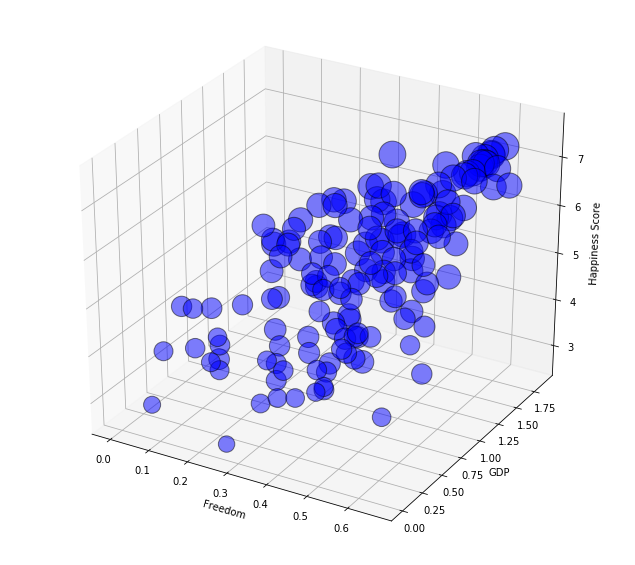

In [9]:
fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(111, projection='3d')


for c, m in [('b', 'o')]:
    xs = happiness_new_data['Freedom']
    ys = happiness_new_data['GDP']
    zs = happiness_new_data['Score']
    ax.scatter(xs, ys, zs, c=c, marker=m, zdir='z',s=happiness_limi_data['Score']*100,alpha=0.5,edgecolors='black')

ax.set_xlabel('Freedom')
ax.set_ylabel('GDP')
ax.set_zlabel('Happiness Score')
# for angle in range(0,360):
#     ax.view_init(30,angle)
plt.savefig('Images/GDPvsFreedom.png')
plt.show()

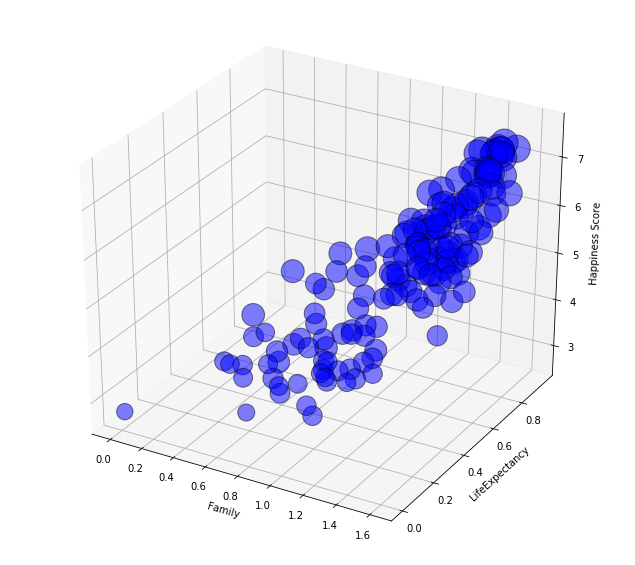

In [10]:
fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(111, projection='3d')


for c, m in [('b', 'o')]:
    xs = happiness_new_data['Family']
    ys = happiness_new_data['LifeExpectancy']
    zs = happiness_new_data['Score']
    ax.scatter(xs, ys, zs, c=c, marker=m, zdir='z',s=happiness_limi_data['Score']*100,alpha=0.5,edgecolors='black')

ax.set_xlabel('Family')
ax.set_ylabel('LifeExpectancy')
ax.set_zlabel('Happiness Score')
# for angle in range(0,360):
#     ax.view_init(30,angle)
plt.savefig('Images/FamilyvsLifeExp.png')
plt.show()

In [11]:
happiness_new_data.head()

,Country,Rank,Score,GDP,Family,LifeExpectancy,Freedom,Generosity,Trust,DystopiaResidual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [12]:
countries_file = ('Data/countries.csv')
country_data = pd.read_csv(countries_file)
country_data.head()

,ISO 3166 Country Code,Country,Latitude,Longitude
0,AD,Andorra,42.50,1.50
1,AE,United Arab Emirates,24.00,54.00
2,AF,Afghanistan,33.00,65.00
3,AG,Antigua and Barbuda,17.05,-61.80
4,AI,Anguilla,18.25,-63.17


In [13]:
map_data = happiness_new_data.merge(country_data, how='left',on =['Country'])
map_data.columns = ['Country','Rank','Score','GDP','Family','LifeExpectancy','Freedom','Generosity','Trust','DystopiaResidual','CountryCode','Latitude','Longitude']
map_data.head()

,Country,Rank,Score,GDP,Family,LifeExpectancy,Freedom,Generosity,Trust,DystopiaResidual,CountryCode,Latitude,Longitude
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,NO,62.0,10.0
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,DK,56.0,10.0
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,IS,65.0,-18.0
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,CH,47.0,8.0
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,FI,64.0,26.0


In [15]:
# Create happinessdata.sqllite database with MapData

# Create happinessdata Class
class happinessData(Base): 
    __tablename__ = 'happiness'
    id = Column(Integer, primary_key=True)
    Country = Column(String(50))
    Rank = Column(String(10))
    Score = Column(Float(50))
    GDP = Column(Float(50))
    Family = Column(Float(50))
    LifeExpectancy = Column(Float(50))
    Freedom = Column(Float(50))
    Generosity = Column(Float(50))
    Trust = Column(Float(50))
    DystopiaResidual = Column(Float(50))
    CountryCode = Column(String(50))
    Latitude = Column(Float(50))
    Longitude = Column(Float(50))

In [18]:
# Create hawaii.sqllite database connection

from sqlalchemy import create_engine
engine = create_engine("sqlite:///happinessdata.sqlite")
conn = engine.connect()

#Create Tables
Base.metadata.create_all(engine)
#Create session
from sqlalchemy.orm import Session
session = Session(bind=engine)

# #Delete exisitng data in the tables
# Base.metadata.drop_all(engine)
# engine.table_names()

In [19]:
# Load data to Happiness SQLite Database

map_data.to_sql(name='happiness', con=conn, flavor='sqlite',if_exists='append',index=False)

C:\Users\santo\Anaconda3\envs\PythonData\lib\site-packages\pandas\io\sql.py:531: FutureWarning: the 'flavor' parameter is deprecated and will be removed in a future version, as 'sqlite' is the only supported option when SQLAlchemy is not installed.
  _validate_flavor_parameter(flavor)
